In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

## Loading Data

In [3]:
df = pd.read_csv(r"C:\gold_price_pridication\Gold_data_Excel.csv",parse_dates = ['date'],index_col='date')
df.head()

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75


In [4]:
df.tail()

,price
date,
2021-12-17,4394.4
2021-12-18,4389.5
2021-12-19,4389.5
2021-12-20,4354.1
2021-12-21,4346.5


In [5]:
df.shape

(2182, 1)

In [6]:
print(f"The Full year Gold prices are available for {df.index.year.max() - df.index.year.min()} years")

The Full year Gold prices are available for 5 years


In [13]:
## Data Cleaning/ Data Exploration

+ Detecting and Handling Missing values

In [14]:
missing_values = df.isnull().sum() # Handing missing values
print(f"Missing Values are :- {missing_values}")

Missing Values are :- price    0
dtype: int64


#### No missing values in the data set

+ Detecting and Handling Duplicate values

In [15]:
df[df.duplicated()]

,price
date,
2016-04-24,2651.4
2016-04-30,2521.5
2016-06-20,2759.8
2016-08-05,2679.9
2016-09-05,2705.0
...,...
2021-12-06,4413.6
2021-12-09,4219.4
2021-12-12,4333.5


+ Since our date is already set as index we are filnding duplicate value for price column but for any entry being duplicate both the date and price should be repeated, for checking that we rest our index temporarily 

In [16]:
df_reset = df.reset_index()
print(f"Total Duplicates in the Data are {df_reset[df_reset.duplicated(subset=['date','price'])]}")

Total Duplicates in the Data are Empty DataFrame
Columns: [date, price]
Index: []


+ Checking and Handling outliers

In [17]:
df_3 = df.copy()

In [18]:
from scipy import stats
score = stats.zscore(df_3['price'])
abs_zscore = np.abs(score)
filtered_entries = df_3[abs_zscore < 3]

In [19]:
print(filtered_entries.shape)

(2182, 1)


+ As we can see that the shape of dataframes 'filtered_entries' and 'df' is same we can be assured that there is no outlier in our data

### Normality Check for the Data

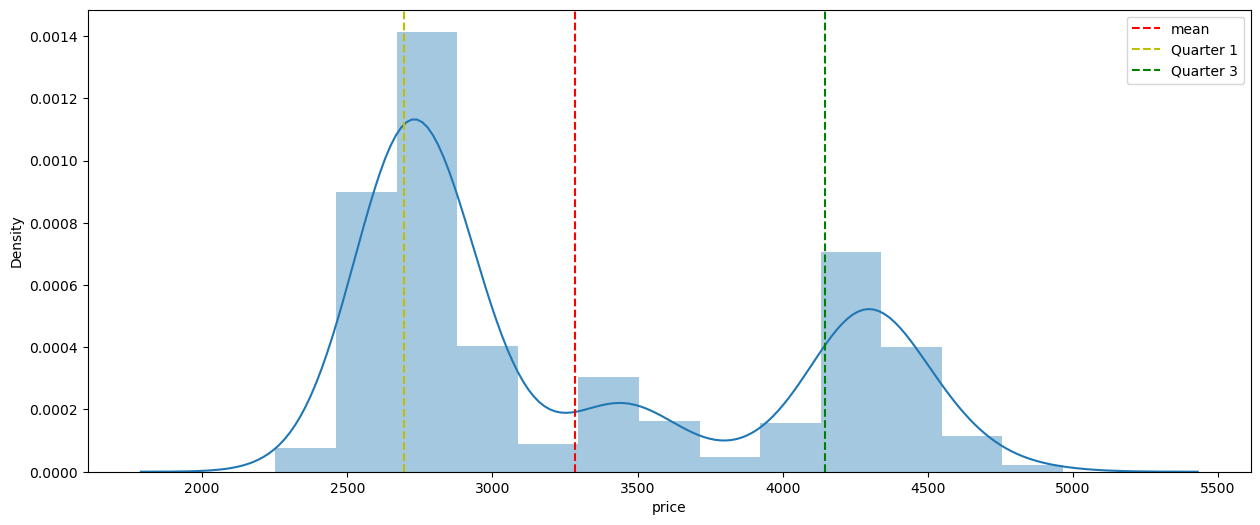

In [20]:
plt.figure(figsize=(15,6))
sns.distplot(df['price'])
plt.axvline(x = np.mean(df['price']),c = 'r', ls = '--', label = 'mean')
plt.axvline(x = np.percentile(df['price'],25),c = 'y', ls = '--', label = 'Quarter 1')
plt.axvline(x = np.percentile(df['price'],75),c = 'g', ls = '--', label = 'Quarter 3')
plt.legend()
plt.show()

## Checking the Trend in Data

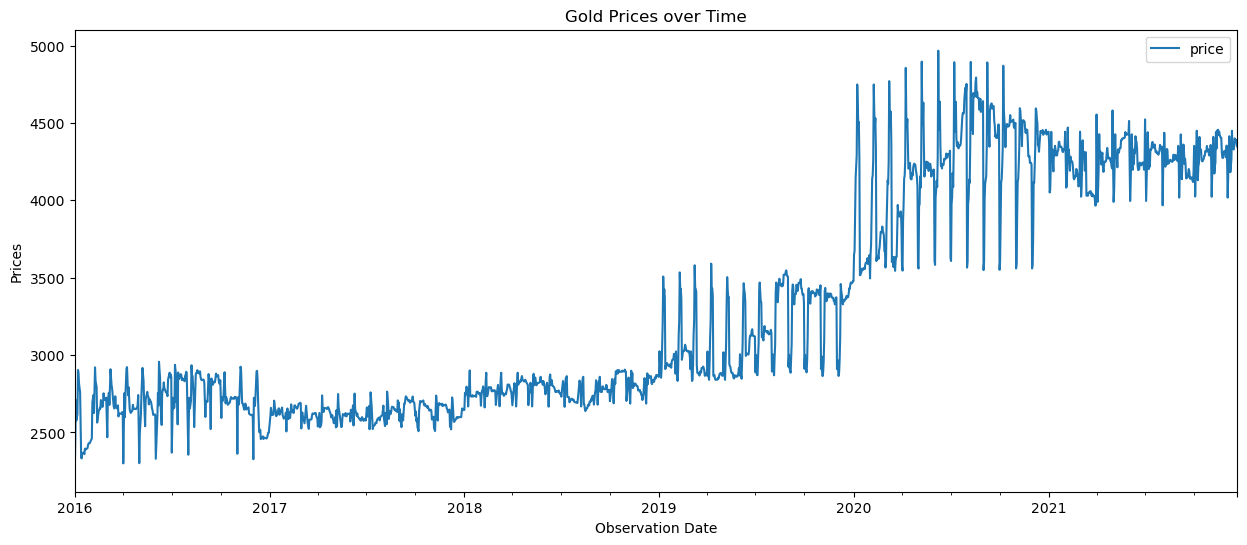

In [21]:
df.plot(figsize = (15,6))
plt.xlabel("Observation Date")
plt.ylabel("Prices")
plt.title("Gold Prices over Time")
plt.show()

In [22]:
df_temp = df.copy()
df_temp['Percentage Change'] = df_temp['price'].pct_change()*100
df_temp.head()

,price,Percentage Change
date,,
2016-01-01,2252.60,NaN
2016-01-02,2454.50,8.962976
2016-01-03,2708.10,10.332043
2016-01-04,2577.80,-4.811491
2016-01-05,2597.75,0.773916


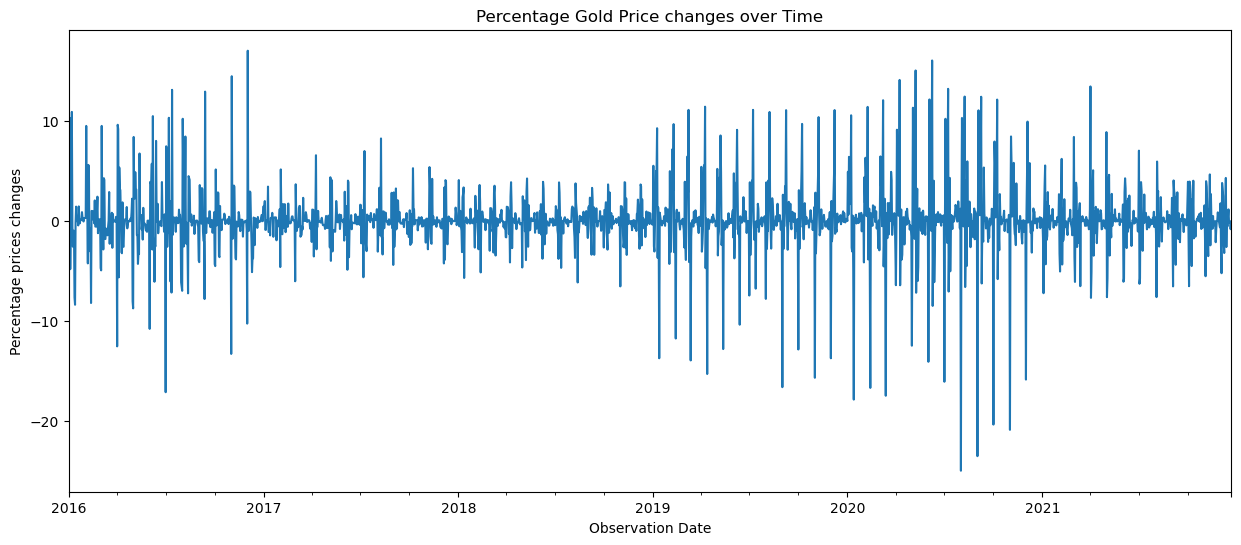

In [23]:
df_temp['Percentage Change'].plot(figsize = (15,6))
plt.xlabel("Observation Date")
plt.ylabel("Percentage prices changes")
plt.title("Percentage Gold Price changes over Time")
plt.show()

#### Simple moving average

In [24]:
df1 = df.copy()
df1.head()

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75


In [25]:
df1['7day_rolling'] = df1.rolling(window=7,min_periods=1).mean()

In [26]:
df1.tail()

,price,7day_rolling
date,,
2021-12-17,4394.4,4372.128571
2021-12-18,4389.5,4363.642857
2021-12-19,4389.5,4371.642857
2021-12-20,4354.1,4372.028571
2021-12-21,4346.5,4374.642857


### 7 day is better to  use, 

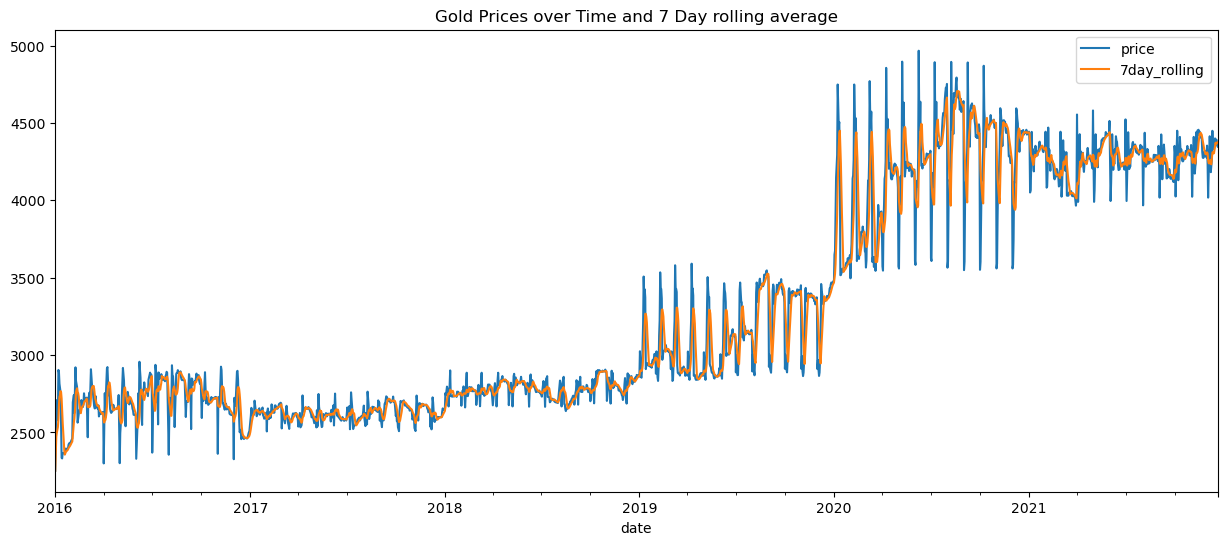

In [27]:
df1[['price','7day_rolling']].plot(figsize=(15,6))
plt.title("Gold Prices over Time and 7 Day rolling average")
plt.legend()
plt.show()

### Expanding - Cummlative moving average

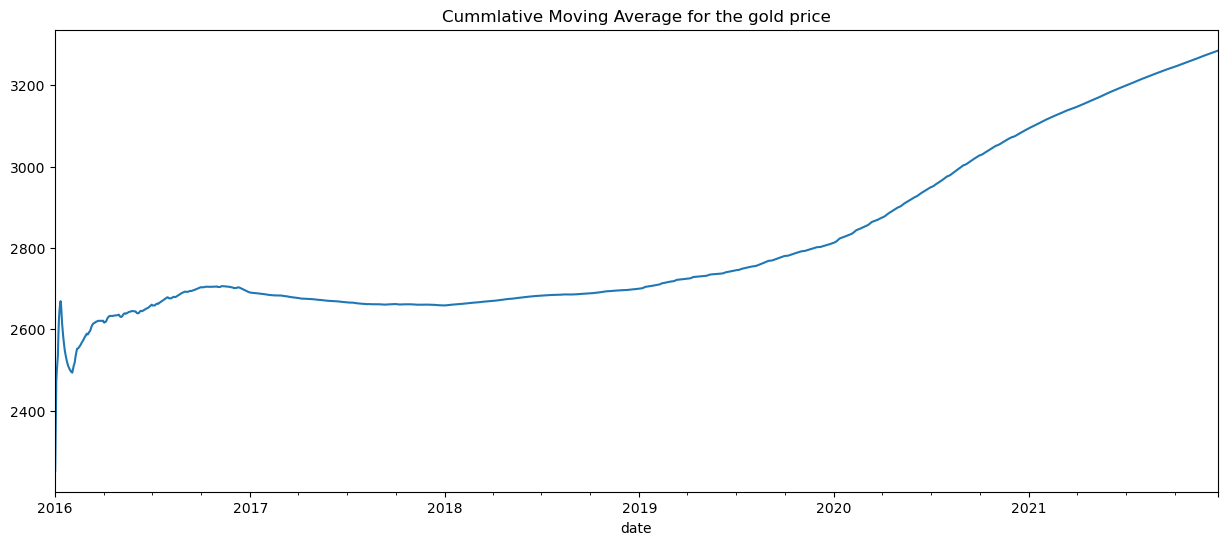

In [28]:
df1['price'].expanding().mean().plot(figsize= (15,6))
plt.title("Cummlative Moving Average for the gold price")
plt.show()

### EMA :- Exponential Moving Average

In [29]:
df1['EMA_0.5'] = df1['price'].ewm(alpha=0.5,adjust=False).mean()

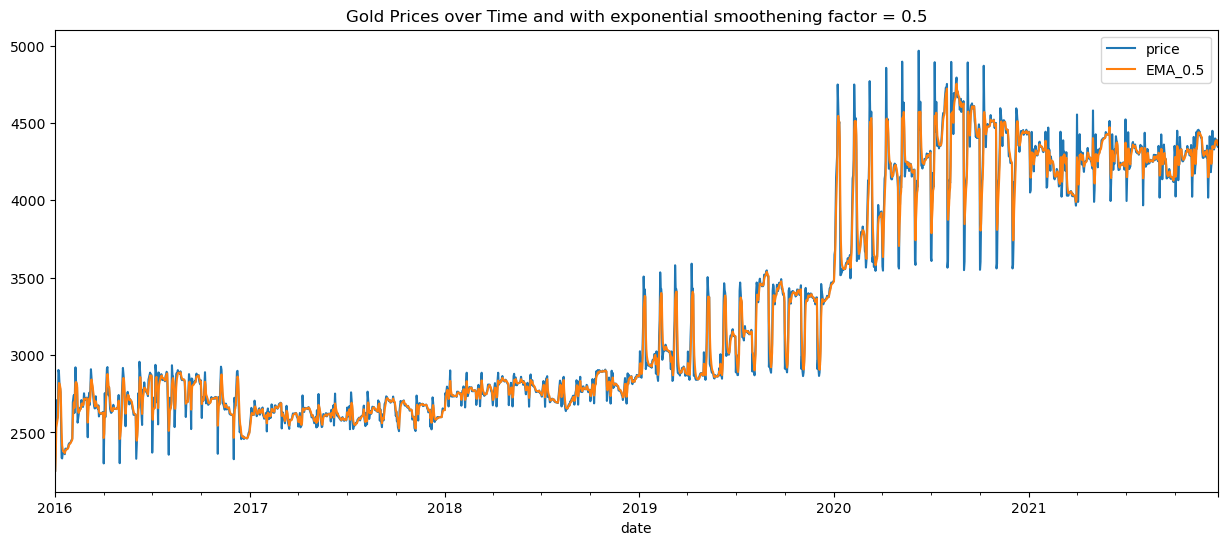

In [30]:
df1[['price','EMA_0.5']].plot(figsize=(15,6))
plt.title("Gold Prices over Time and with exponential smoothening factor = 0.5")
plt.legend()
plt.show()

In [31]:
df1['EMA_0.7'] = df1['price'].ewm(alpha=0.7,adjust=False).mean()

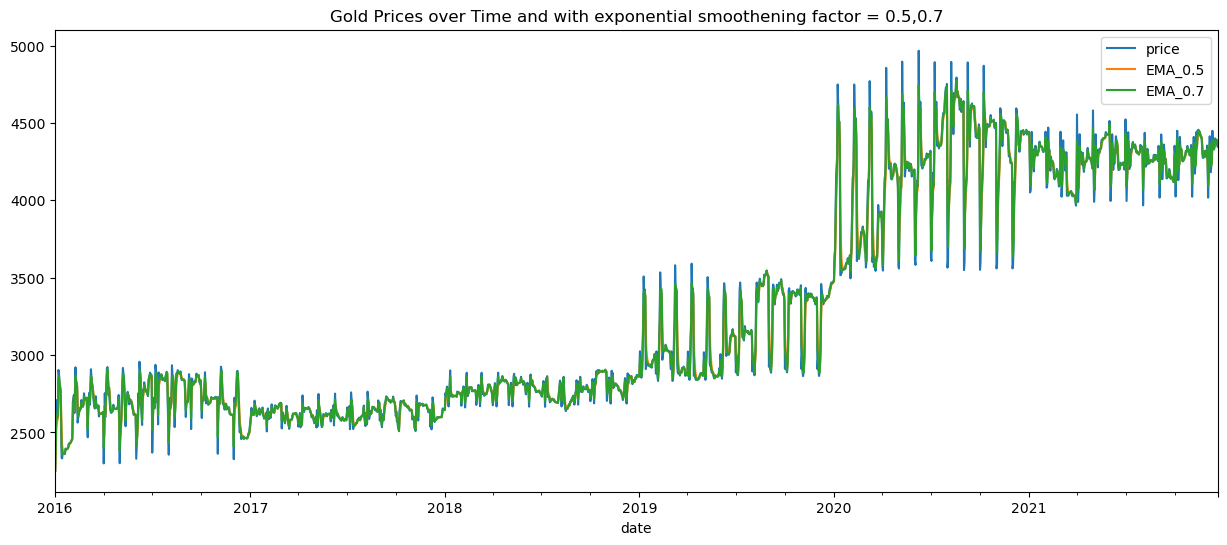

In [32]:
df1[['price','EMA_0.5','EMA_0.7']].plot(figsize=(15,6))
plt.title("Gold Prices over Time and with exponential smoothening factor = 0.5,0.7")
plt.legend()
plt.show()

### Monthly variation of the Gold Price 

In [33]:
df2= df.copy()
df2_resampled = df2.resample('M').mean()

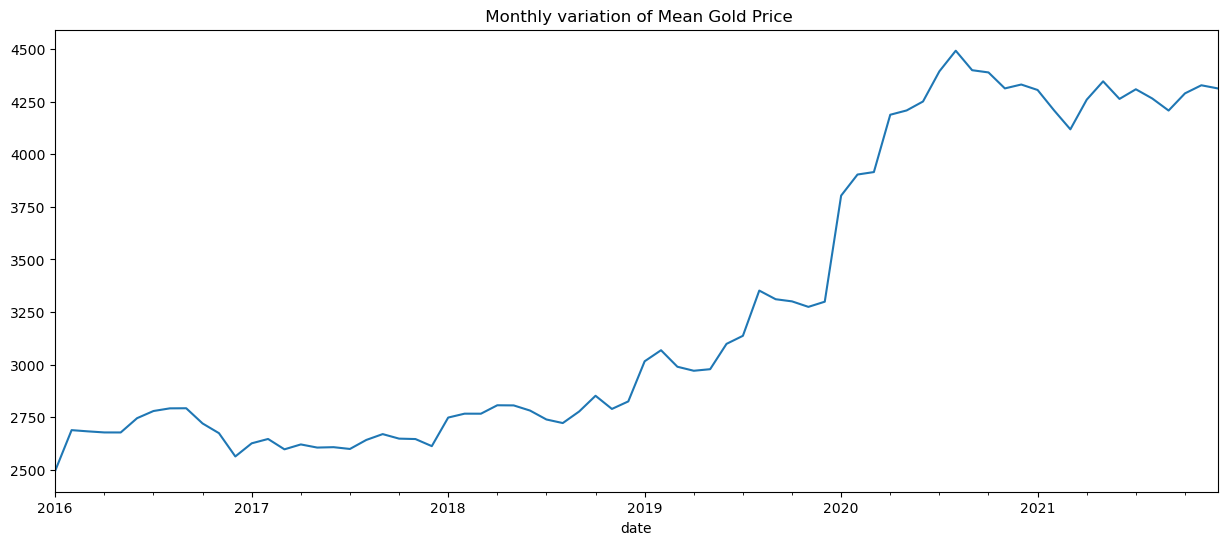

In [34]:
df2_resampled['price'].plot(figsize=(15,6))
plt.title(" Monthly variation of Mean Gold Price")
plt.show()

In [35]:
df2_resampled.tail()

,price
date,
2021-08-31,4264.919355
2021-09-30,4207.506667
2021-10-31,4289.148387
2021-11-30,4327.633333
2021-12-31,4312.733333


### Weekly variation of the Gold Price

In [36]:
df3 = df.copy()
df3_resampled = pd.DataFrame(df3['price'].resample('W').mean())

In [37]:
df3_resampled.head()

,price
date,
2016-01-03,2471.733333
2016-01-10,2740.778571
2016-01-17,2439.657143
2016-01-24,2385.528571
2016-01-31,2427.692857


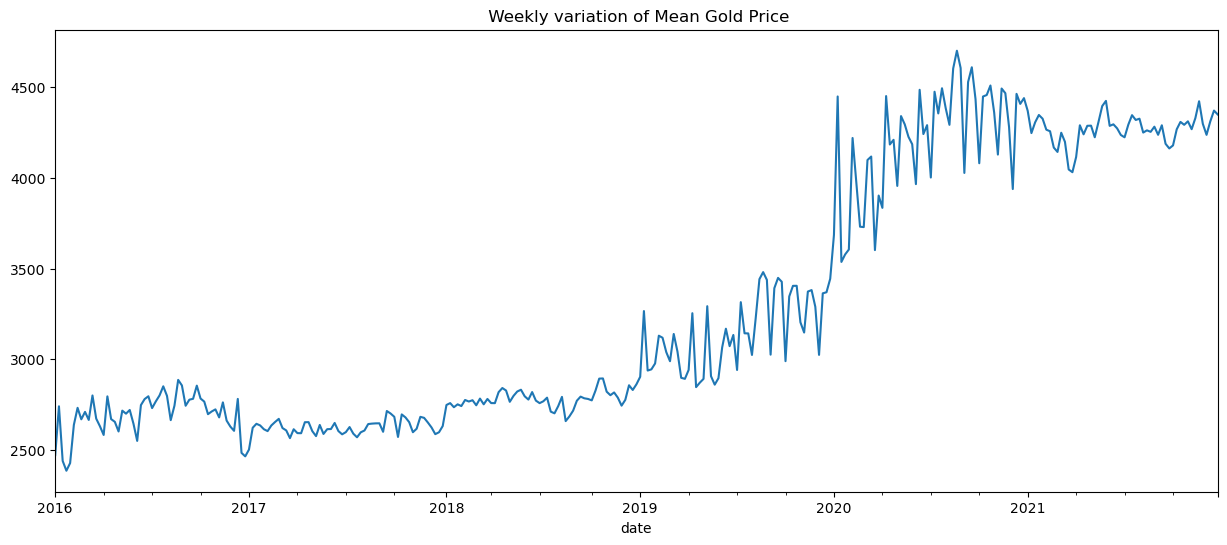

In [38]:
df3_resampled['price'].plot(figsize=(15,6))
plt.title(" Weekly variation of Mean Gold Price")
plt.show()

## Ploting The Data Series as a Heatmap per year to observe the Daily Gold Price Fluctuation

In [39]:
import calplot
calplot.calplot(df['price'],edgecolor = None, yearlabel_kws={'fontname':'sans-serif'})

ModuleNotFoundError: No module named 'calplot'

## Weekly wise plots, monthly wise, exponential transformation to data and plot it for monthly check it is stationary or not.... check for autocorrelation plot, partial corelation plot , decide which model to be fitted 

## Stationary Check by Augmented dicky fuller test

In [40]:
from statsmodels.tsa.stattools import adfuller

In [41]:
def stationarity_check(series):
    result = adfuller(series)
    print(f"ADF statistics {result[0]}")
    print(f"       p-value  {result[1]}")
    if result[1] < 0.05:            ## p - low, null go
        print("""Strong Evidence Against null hypothesis data has no unit root and
                       is Stationary, reject null hypothesis""")
    else:
        print("Failed to reject null hypothesis data has unit root and is not Stationary ")

In [42]:
stationarity_check(df['price'])

ADF statistics -0.3099036570504764
       p-value  0.9240899189079188
Failed to reject null hypothesis data has unit root and is not Stationary 


In [43]:
df['First_difference'] = df['price']-df['price'].shift(1)
df.head()

,price,First_difference
date,,
2016-01-01,2252.60,NaN
2016-01-02,2454.50,201.90
2016-01-03,2708.10,253.60
2016-01-04,2577.80,-130.30
2016-01-05,2597.75,19.95


In [44]:
stationarity_check(df['First_difference'].dropna())

ADF statistics -21.664542127246406
       p-value  0.0
Strong Evidence Against null hypothesis data has no unit root and
                       is Stationary, reject null hypothesis


### 1 week Differencing (assuming 7 day seasonal data)

In [45]:
df['7_difference'] = df['price']-df['price'].shift(7)
df.head()

,price,First_difference,7_difference
date,,,
2016-01-01,2252.60,NaN,NaN
2016-01-02,2454.50,201.90,NaN
2016-01-03,2708.10,253.60,NaN
2016-01-04,2577.80,-130.30,NaN
2016-01-05,2597.75,19.95,NaN


In [46]:
stationarity_check(df['7_difference'].dropna())

ADF statistics -13.504453298649615
       p-value  2.933854892108645e-25
Strong Evidence Against null hypothesis data has no unit root and
                       is Stationary, reject null hypothesis


### 1 month differencing (Assuming 30 day seasonal data)

In [47]:
df['30_difference'] = df['price']-df['price'].shift(30)
df.head()

,price,First_difference,7_difference,30_difference
date,,,,
2016-01-01,2252.60,NaN,NaN,NaN
2016-01-02,2454.50,201.90,NaN,NaN
2016-01-03,2708.10,253.60,NaN,NaN
2016-01-04,2577.80,-130.30,NaN,NaN
2016-01-05,2597.75,19.95,NaN,NaN


In [48]:
stationarity_check(df['30_difference'].dropna())

ADF statistics -10.012615740241895
       p-value  1.7623278406161932e-17
Strong Evidence Against null hypothesis data has no unit root and
                       is Stationary, reject null hypothesis


### 1 year differencing (Assuming 365 day seasonal data)

In [49]:
df['365_difference'] = df['price']-df['price'].shift(365)
df.head()

,price,First_difference,7_difference,30_difference,365_difference
date,,,,,
2016-01-01,2252.60,NaN,NaN,NaN,NaN
2016-01-02,2454.50,201.90,NaN,NaN,NaN
2016-01-03,2708.10,253.60,NaN,NaN,NaN
2016-01-04,2577.80,-130.30,NaN,NaN,NaN
2016-01-05,2597.75,19.95,NaN,NaN,NaN


In [50]:
stationarity_check(df['365_difference'].dropna())

ADF statistics -1.3023794771284165
       p-value  0.6280829980822755
Failed to reject null hypothesis data has unit root and is not Stationary 


## Absence yearly seasonality indicates that SARIMA is not suitable for the data

### ACF and PACF plot

#####  Data which is below the lower limit or above the upper limit will have a direct impact 

In [51]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

+ ACF and PACF plot for 1 day fifference

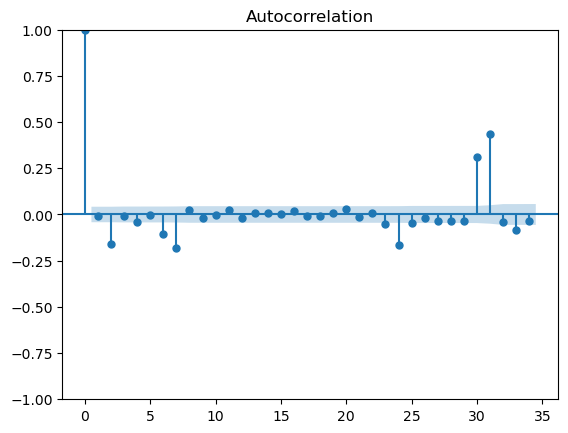

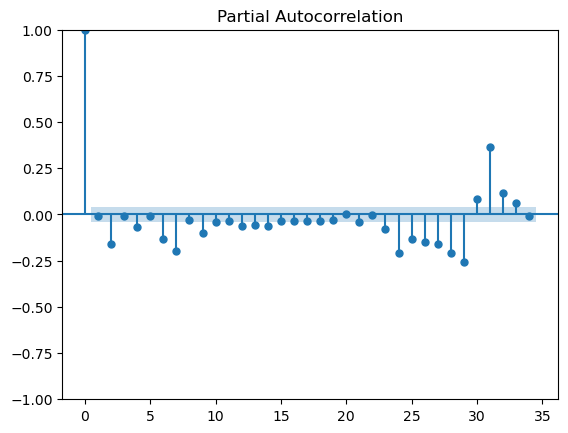

In [52]:
acf = plot_acf(df['First_difference'].dropna())
pacf = plot_pacf(df['First_difference'].dropna())

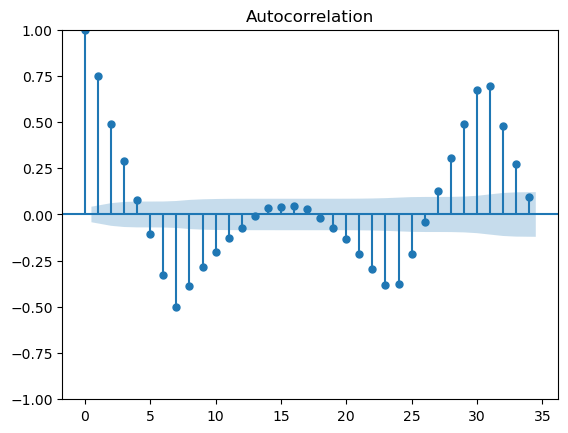

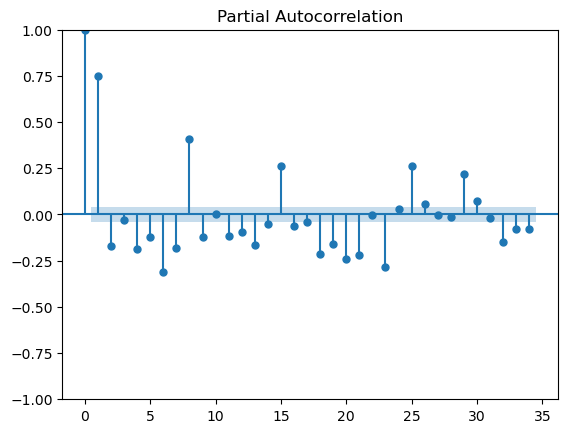

In [53]:
acf = plot_acf(df['7_difference'].dropna())
pcaf = plot_pacf(df['7_difference'].dropna())

## Ma'am Instruction :- use 7 day, 30 day MA(moving average not difference !)  data for ACF plot it should be straight line look at the change 
## chosse 30 MA data for model ARMA model then use SRIMA/SRIMAX model check accuracy also 


In [55]:
df2_resampled.head()

,price
date,
2016-01-31,2495.832258
2016-02-29,2688.703448
2016-03-31,2682.854839
2016-04-30,2677.790000
2016-05-31,2677.650000


In [56]:
df3_resampled.head()

,price
date,
2016-01-03,2471.733333
2016-01-10,2740.778571
2016-01-17,2439.657143
2016-01-24,2385.528571
2016-01-31,2427.692857


+ ACF and PACF plot for 30 days mean

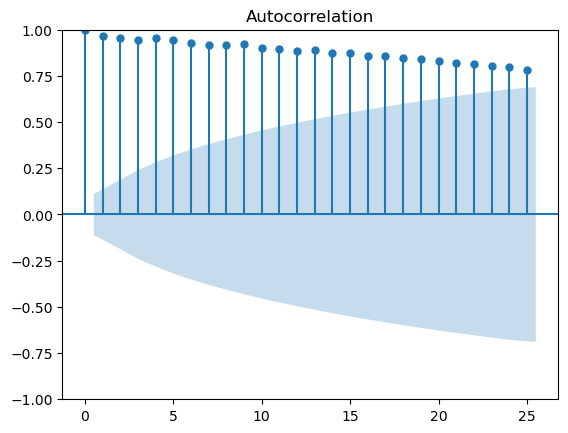

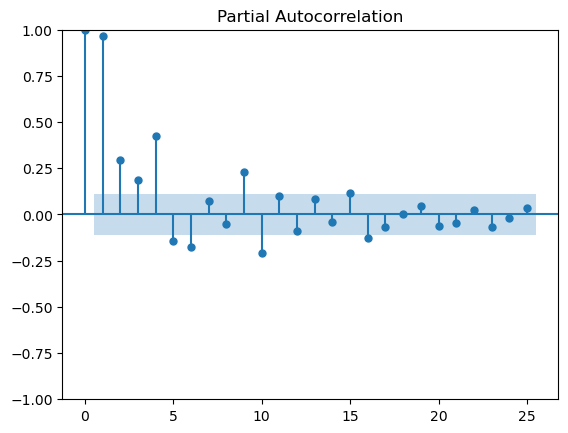

In [57]:
acf_30 = plot_acf(df3_resampled['price'])
pacf_30 = plot_pacf(df3_resampled['price'])

+ ACF and PACF plot for 7 day mean

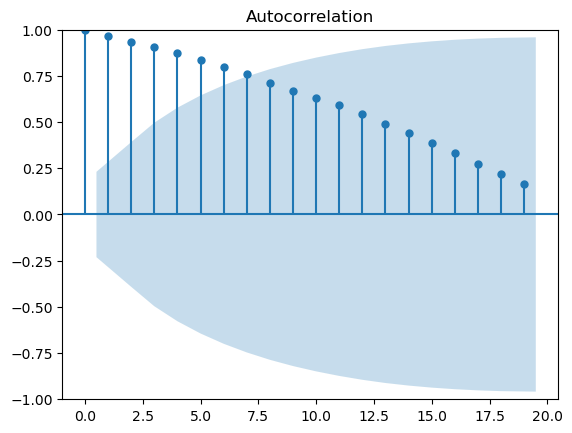

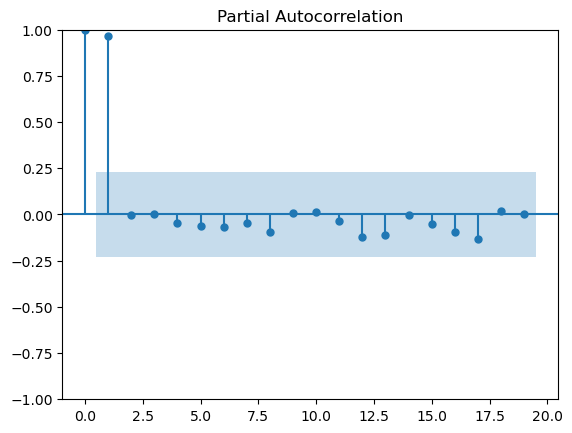

In [58]:
acf_7 = plot_acf(df2_resampled['price'])
pacf_7 = plot_pacf(df2_resampled['price'])

### ETS(Error-Trend-Seasonality) decomposition of the data

In [59]:
from statsmodels.tsa.seasonal import STL

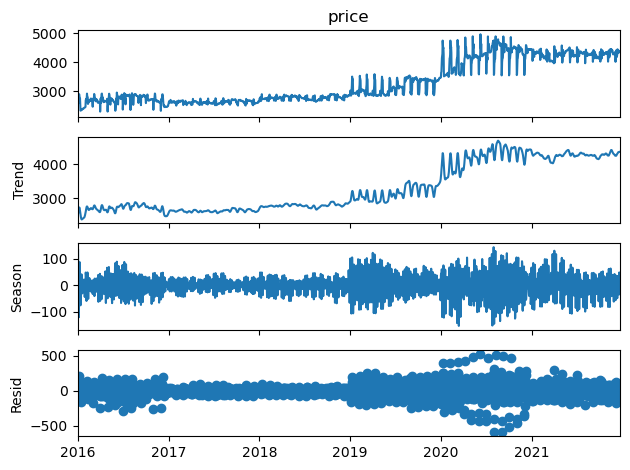

In [60]:
df5 = STL(df['price']).fit()
df5.plot()
plt.show()


## Build model and Accuracy test, accuracy should 90 % for train and  91 % for test data something like that 


In [61]:
!pip install pmdarima

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for pmdarima from https://files.pythonhosted.org/packages/ac/f8/6c9364602b13f0dba129b53acd1344859690911a4d5021560d9fd6aa087f/pmdarima-2.0.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for Cython!=0.29.18,!=0.29.31,>=0.29 from https://files.pythonhosted.org/packages/20/50/638cbeb5b202b39d0605f6170fe25ed75287152827b0282d64135995b32b/Cython-3.0.9-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
   --- ----------------------------------- 61.4/614.7 kB 825.8 kB/s eta 0:00:01
   ------ ------------------------------- 112.6/614.7 kB 939.4 kB/s eta 0:00:01
   ----------- ---------------------------- 174.1/614.7 kB 1.1 MB/s eta 0:00:01
   --------------- ------------------------ 245.8/614.7 kB 1.2 MB/s eta 0:00:01
   --------------

In [92]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [90]:
df2_resampled.drop(['First_difference', '7_difference', '30_difference','365_difference'],axis=1,inplace=True)
df2_resampled.head()

,price
date,
2016-01-31,2495.832258
2016-02-29,2688.703448
2016-03-31,2682.854839
2016-04-30,2677.790000
2016-05-31,2677.650000


In [93]:
step_wise_fit = auto_arima(df2_resampled,trace=True,suppress_warnings=True)
step_wise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=853.440, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=850.923, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=852.235, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=852.021, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=853.980, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=849.580, Time=0.25 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=851.210, Time=0.42 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=851.300, Time=0.34 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=852.254, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=853.570, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=851.888, Time=0.13 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 2.399 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   72
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -420.790
Date:                Fri, 22 Mar 2024   AIC                            849.580
Time:                        17:05:28   BIC                            858.631
Sample:                    01-31-2016   HQIC                           853.179
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     42.4441     28.868      1.470      0.141     -14.137      99.025
ar.L1         -0.6404      0.249     -2.577      0.010      -1.128      -0.153
ma.L1          0.8600      0.148      5.814      0.000       0.570       1.150
sigma2      8217.4221   1229.943      6.681      0.000    5806.779    1.06e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):               151.03
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):               3.89   Skew:                             1.88
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### ARIMA model for 7 day average 

In [94]:
df3_resampled.head()

,price
date,
2016-01-03,2471.733333
2016-01-10,2740.778571
2016-01-17,2439.657143
2016-01-24,2385.528571
2016-01-31,2427.692857


In [95]:
step_wise_fit_week = auto_arima(df3_resampled,trace=True,suppress_warnings=True)
step_wise_fit_week.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3943.151, Time=1.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4086.075, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4048.320, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3977.237, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4084.476, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3972.486, Time=1.19 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3966.463, Time=0.71 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3885.013, Time=0.77 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3887.138, Time=0.32 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=3886.872, Time=1.46 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=3886.938, Time=1.11 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=3920.838, Time=1.65 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=3850.783, Time=1.52 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=3886.994, Time=0.27 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  313
Model:               SARIMAX(4, 1, 4)   Log Likelihood               -1907.032
Date:                Fri, 22 Mar 2024   AIC                           3834.064
Time:                        17:10:52   BIC                           3871.494
Sample:                    01-03-2016   HQIC                          3849.023
                         - 12-26-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      9.3321     22.196      0.420      0.674     -34.170      52.835
ar.L1         -1.6376      0.055    -29.953      0.000      -1.745      -1.530
ar.L2         -1.2482      0.099    -12.665      0.000      -1.441      -1.055
ar.L3         -1.2357      0.082    -15.081      0.000      -1.396      -1.075
ar.L4         -0.7582      0.042    -18.141      0.000      -0.840      -0.676
ma.L1          1.1983      0.059     20.204      0.000       1.082       1.315
ma.L2          0.2086      0.075      2.797      0.005       0.062       0.355
ma.L3          0.0733      0.108      0.676      0.499      -0.139       0.286
ma.L4          0.1858      0.083      2.235      0.025       0.023       0.349
sigma2      1.204e+04    515.997     23.325      0.000     1.1e+04     1.3e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              2527.36
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               6.17   Skew:                             1.73
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""